# 💽 Hardware Failure Monitoring (Disk & Server Health)

## 🎯 Project Objective  
To simulate and detect hardware anomalies using Isolation Forest based on SMART attributes, server health indicators, and environmental conditions.

## 🧾 Feature List

In [1]:
feature_list = [
    'smart_5_reallocated_sector_count',
    'smart_187_uncorrectable_errors',
    'smart_197_pending_sector_count',
    'smart_198_offline_uncorrectable',
    'smart_199_crc_errors',
    'smart_9_power_on_hours',
    'smart_194_temp',
    'disk_read_speed_MBps',
    'disk_write_speed_MBps',
    'disk_io_util_percent',
    'cpu_temp',
    'power_usage_watts',
    'cpu_usage_percent',
    'memory_usage_percent'
]

## 📦 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## 🧹 2. Simulate Sample Training Data

In [3]:
np.random.seed(42)
num_samples = 1000

def simulate_data(n):
    return pd.DataFrame({
        'smart_5_reallocated_sector_count': np.random.poisson(2, n),
        'smart_187_uncorrectable_errors': np.random.poisson(1, n),
        'smart_197_pending_sector_count': np.random.poisson(1, n),
        'smart_198_offline_uncorrectable': np.random.poisson(1, n),
        'smart_199_crc_errors': np.random.poisson(1, n),
        'smart_9_power_on_hours': np.random.normal(20000, 5000, n),
        'smart_194_temp': np.random.normal(35, 5, n),
        'disk_read_speed_MBps': np.random.normal(150, 30, n),
        'disk_write_speed_MBps': np.random.normal(100, 25, n),
        'disk_io_util_percent': np.random.normal(50, 10, n),
        'cpu_temp': np.random.normal(60, 10, n),
        'power_usage_watts': np.random.normal(150, 30, n),
        'cpu_usage_percent': np.random.normal(50, 15, n),
        'memory_usage_percent': np.random.normal(60, 10, n),
    })

data = simulate_data(num_samples)
data.head()

,smart_5_reallocated_sector_count,smart_187_uncorrectable_errors,smart_197_pending_sector_count,smart_198_offline_uncorrectable,smart_199_crc_errors,smart_9_power_on_hours,smart_194_temp,disk_read_speed_MBps,disk_write_speed_MBps,disk_io_util_percent,cpu_temp,power_usage_watts,cpu_usage_percent,memory_usage_percent
0,4,1,0,0,1,20809.197365,36.674645,135.436759,97.922367,43.032952,66.291799,120.699204,72.309194,84.297560
1,1,2,2,1,0,28171.915993,42.940870,116.715734,127.416772,62.494014,43.709067,139.755994,63.097334,73.652261
2,3,1,0,2,0,17013.014372,28.167568,172.844692,131.482914,49.442538,73.818480,160.015129,46.554266,61.619883
3,3,1,3,0,1,19096.116226,28.027917,186.612897,101.331968,48.070411,64.759008,165.294755,40.031273,57.186295
4,1,0,0,1,1,26295.906608,34.191428,177.488076,77.782241,48.651865,93.009719,171.882562,25.803828,63.283885


## 📊 3. Data Preprocessing

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## 🤖 4. Train Isolation Forest Model

In [5]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(scaled_data)
data['anomaly_score'] = model.decision_function(scaled_data)
data['anomaly'] = model.predict(scaled_data)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

## 📈 5. Plot Anomaly Scores

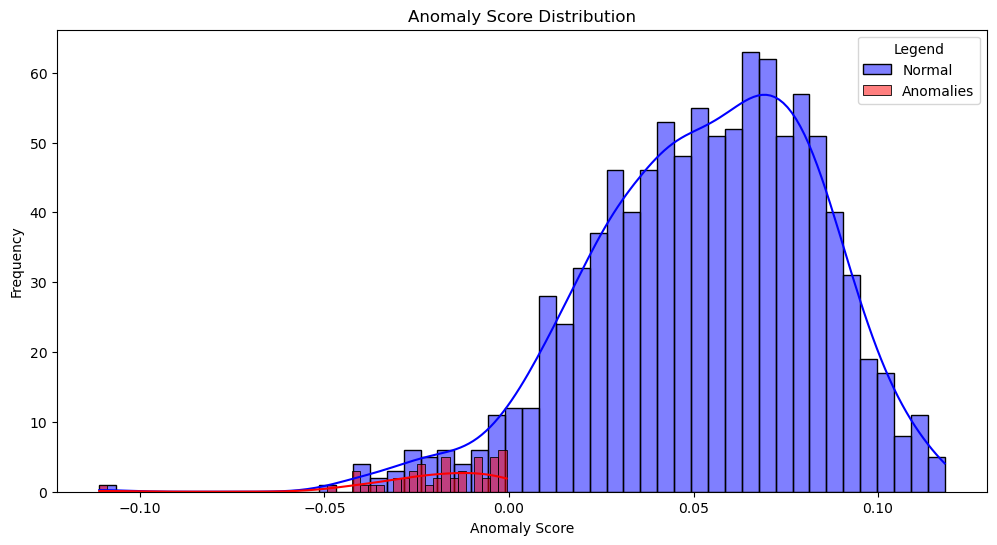

In [7]:
# Plotting Anomaly Scores Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['anomaly_score'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(data[data['anomaly'] == 1]['anomaly_score'], bins=50, kde=True, color='red', label='Anomalies')
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend(title="Legend")
plt.show()


## 🧪 6. Test on Unseen Data

In [9]:
# Generate synthetic test data with injected anomalies
test_data = simulate_data(200)
# Inject anomalies
anomaly_indices = random.sample(range(200), 10)
test_data.iloc[anomaly_indices, 0:5] += 50  # inflate SMART metrics
test_data.iloc[anomaly_indices, 6] += 20   # temp
test_data.iloc[anomaly_indices, 12:] += 30 # CPU & memory

scaled_test = scaler.transform(test_data)
test_data['anomaly'] = model.predict(scaled_test)
test_data['anomaly'] = test_data['anomaly'].map({1: 0, -1: 1})

# Seperate anomalies
anomalies = test_data[test_data['anomaly'] == 1]
anomalies.head()

,smart_5_reallocated_sector_count,smart_187_uncorrectable_errors,smart_197_pending_sector_count,smart_198_offline_uncorrectable,smart_199_crc_errors,smart_9_power_on_hours,smart_194_temp,disk_read_speed_MBps,disk_write_speed_MBps,disk_io_util_percent,cpu_temp,power_usage_watts,cpu_usage_percent,memory_usage_percent,anomaly
6,2,1,0,3,4,18638.376950,43.374008,168.463178,92.787088,44.324116,51.064119,164.368206,22.265932,75.708865,1
10,50,54,51,50,50,19739.682294,57.598667,153.797908,86.937441,45.610492,51.501241,142.599499,55.920121,99.779083,1
17,51,50,52,51,50,25556.880445,46.578876,138.273257,81.485461,53.075529,65.529942,158.135526,79.879496,90.435877,1
30,53,50,51,51,52,23027.564601,61.228625,125.441823,105.135317,40.266426,65.914326,177.829485,74.380065,89.029282,1
31,52,51,50,50,51,19207.918827,59.871997,117.038275,99.004486,60.689184,54.863510,153.539927,96.872095,91.143798,1


In [ ]:
## 📤 7. Export Anomalies to CSV

In [ ]:
anomalies.to_csv("detected_anomalies.csv", index=False)
print(f"Exported {len(anomalies)} anomalies to 'detected_anomalies.csv'")